# Open Source Data Analysis- Exploring Relationships

### 1) Importing Libraries and Setting Path

In [144]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

#creating Paths
path= r'C:\Users\wjzak\Dropbox\Career Foundry\Data Immersion\Module 6- Advanced Analytics & Dashboard Design\09-2025- HR Data MNC- Analysis'

#using the path to pull file name and read the clean products data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'HR_Data_MNC_Data_Cleaned.csv'), index_col = False)

In [145]:
#drop the unnamed variable- we already have an employee ID to reference
df = df.drop(columns=['Unnamed: 0'])

In [147]:
#created categories based on years of experience
df['Experience_Years'].value_counts(dropna = False)

Experience_Years
3     200522
2     199924
4     199866
1     199162
0     198775
6     160410
9     160223
8     160212
5     160112
7     159005
10     41209
13     40149
11     40146
14     40005
12     39709
15       571
Name: count, dtype: int64

## Correlations

In [68]:
#review data types for variables
df.dtypes

Employee_ID           object
Department            object
Job_Title             object
Hire_Date             object
Location              object
Performance_Rating     int64
Experience_Years       int64
Status                object
Work_Mode             object
Salary                 int64
City                  object
Country               object
Status2               object
dtype: object

In [69]:
#Checking for Mixed Types in Columns
for col in df.columns.tolist():
      weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)
    #No output means no mixed columns

### Preparing Variables for correlations

In [70]:
#checking data to convert variables
df['Work_Mode'].value_counts()

Work_Mode
On-site    1199109
Remote      800891
Name: count, dtype: int64

In [71]:
#Creates a numeric binary variable for the correlation
df['Status#2'] = df['Status2'].map({'Active': 1, 'Inactive': 0})

#Create a numeric variable for remote status
df['Remote'] = df['Work_Mode'].map({'Remote': 1, 'On-site': 0})

In [72]:
#converts the salary to a more reasonable number that is equivalent to US Standards
df['Salary'] = np.ceil(df['Salary'] * 7).astype(int)
df.describe().astype(int)

,Performance_Rating,Experience_Years,Salary,Status#2,Remote
count,2000000,2000000,2000000,2000000,2000000
mean,3,5,70758,0,0
std,1,3,31761,0,0
min,1,0,23667,0,0
25%,2,2,48629,0,0
50%,3,5,63987,1,0
75%,4,8,84714,1,1
max,5,15,236670,1,1


In [73]:
#runs a correlation table for only the numeric variables
df.corr(numeric_only=True)

,Performance_Rating,Experience_Years,Salary,Status#2,Remote
Performance_Rating,1.000000,-0.000283,-0.000209,0.001229,0.000047
Experience_Years,-0.000283,1.000000,0.000796,0.000926,0.000503
Salary,-0.000209,0.000796,1.000000,0.000021,0.000157
Status#2,0.001229,0.000926,0.000021,1.000000,-0.000048
Remote,0.000047,0.000503,0.000157,-0.000048,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

<Figure size 800x800 with 0 Axes>

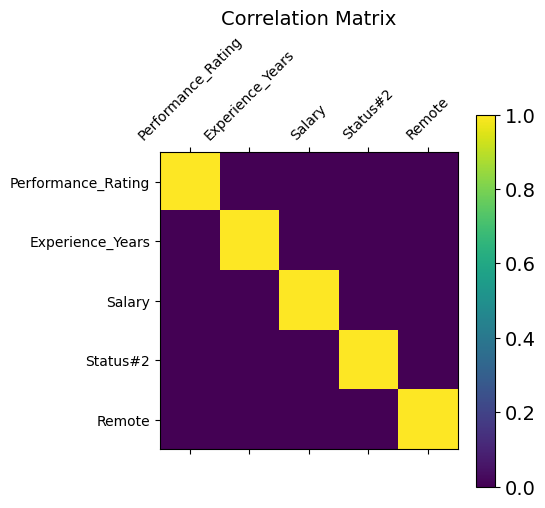

In [74]:
# Add labels, a legend, and change the size of the heatmap
corr = df.corr(numeric_only=True)

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(corr) # type of plot
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=10, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=10)
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

Explanation: There is no relationship between the variables here. This is likely due to vast amount of data being analyzed. With 2 millions rows it is hard to find a relationship when examining the full data. The data will benefit when more specific questions are examined later on.

In [75]:
#Create new data frame for high earners
high_salary_df = df[df['Salary'] > 85000]
corr_high = high_salary_df.corr(numeric_only=True)

#Create new data frame for low earners
low_salary_df = df[df['Salary'] < 45000]
corr_low = low_salary_df.corr(numeric_only=True)

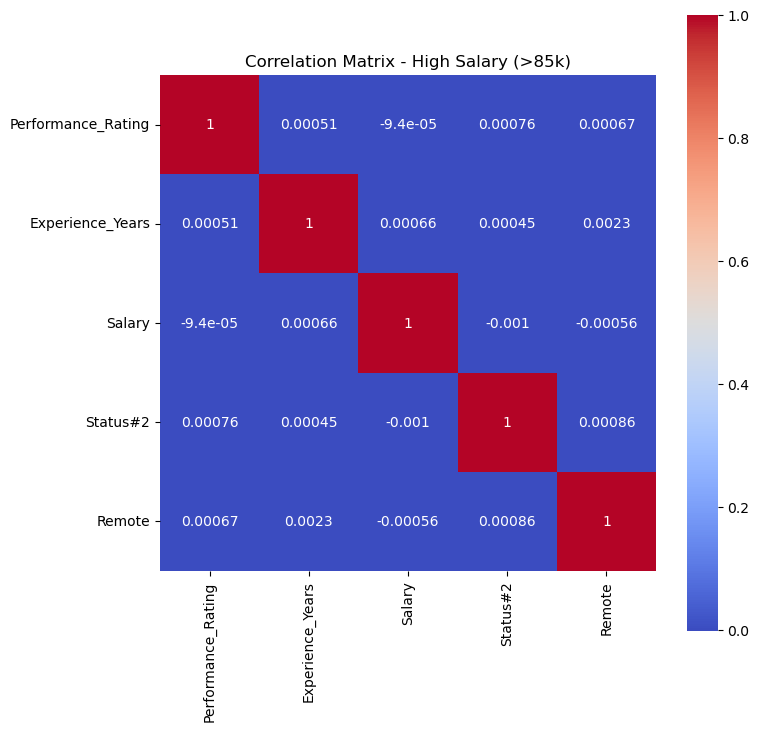

In [76]:
#correlation matrix for high salary only
plt.figure(figsize=(8,8))
sns.heatmap(corr_high, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix - High Salary (>85k)")
plt.show()

Summary: The correlation matrix above does not provide any context for a relationship here. There numbers are pretty much zero across the board.

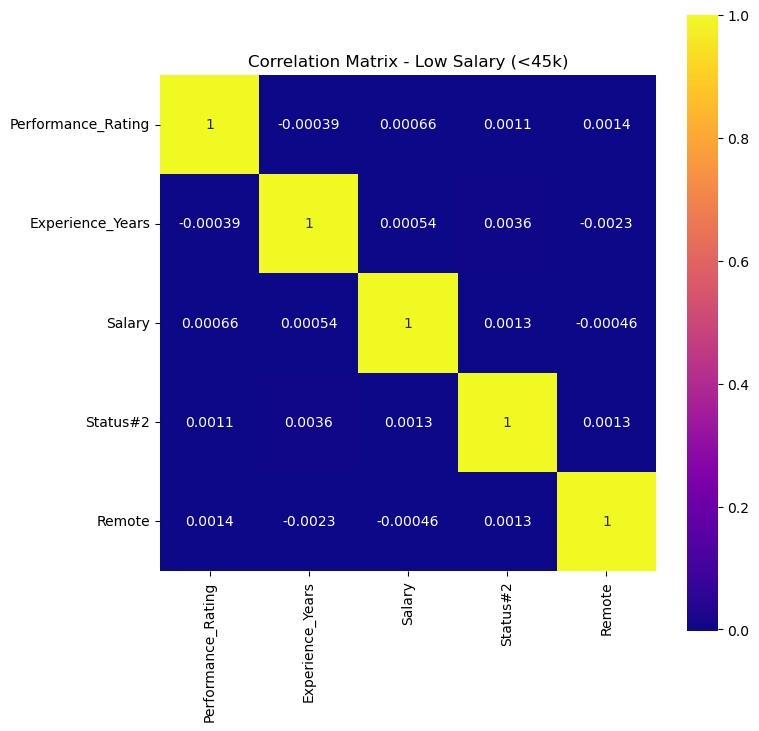

In [77]:
#correlation matrix for low salary only
plt.figure(figsize=(8,8))
sns.heatmap(corr_low, annot=True, cmap='plasma', square=True)
plt.title("Correlation Matrix - Low Salary (<45k)")
plt.show()

Summary: Same as the matrix above- the low salary subsample does not reveal any interesting relationships. The numbers are still pretty much all zero.

In [78]:
#Create a subset excluding the "Date", "Employee ID", and "location" columns
sub = df[['Performance_Rating', 'Experience_Years', 'Salary', 'Remote','Status#2']]
sub

,Performance_Rating,Experience_Years,Salary,Remote,Status#2
0,5,14,125076,0,0
1,2,7,66878,0,1
2,1,2,112826,0,1
3,1,1,78162,0,1
4,5,0,42217,0,1
...,...,...,...,...,...
1999995,3,14,51884,1,1
1999996,3,4,81270,0,1
1999997,5,1,103593,1,1
1999998,4,2,116739,0,0


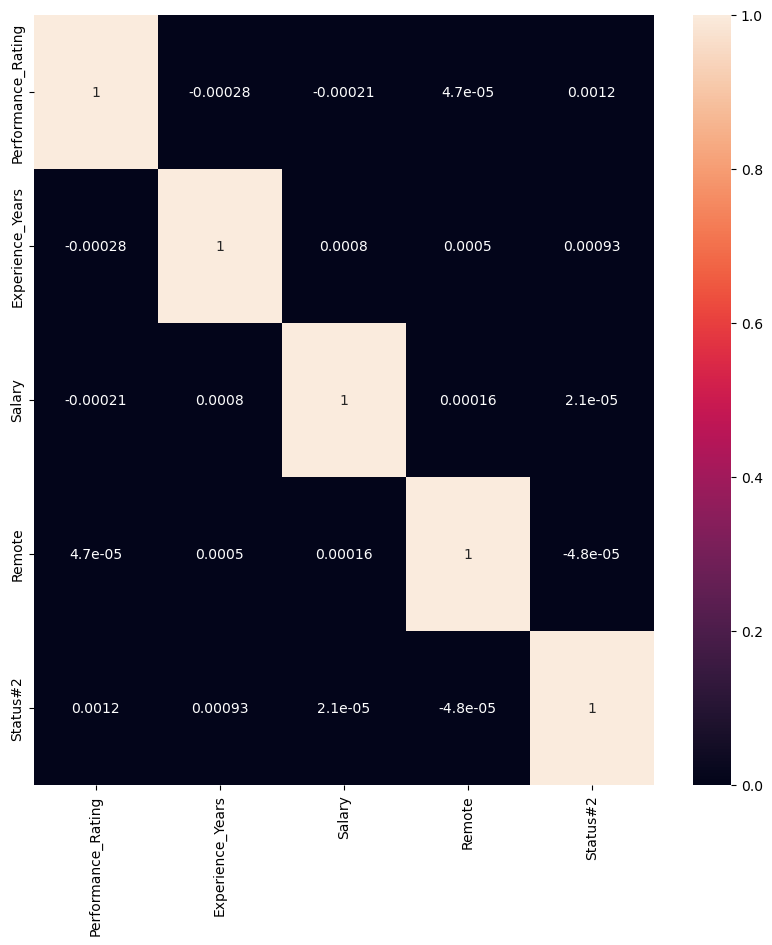

In [79]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

Another example of a correlation matrix- all values are basically zero again. This one uses the full sample and include numerical correlational values.

In [80]:
#MY attempt to discover additional information about these variables 
#this reduces the sample further to just US-based employees
US_df = df[df['Country'] == "United States of America"]
corr_US = US_df.corr(numeric_only=True)

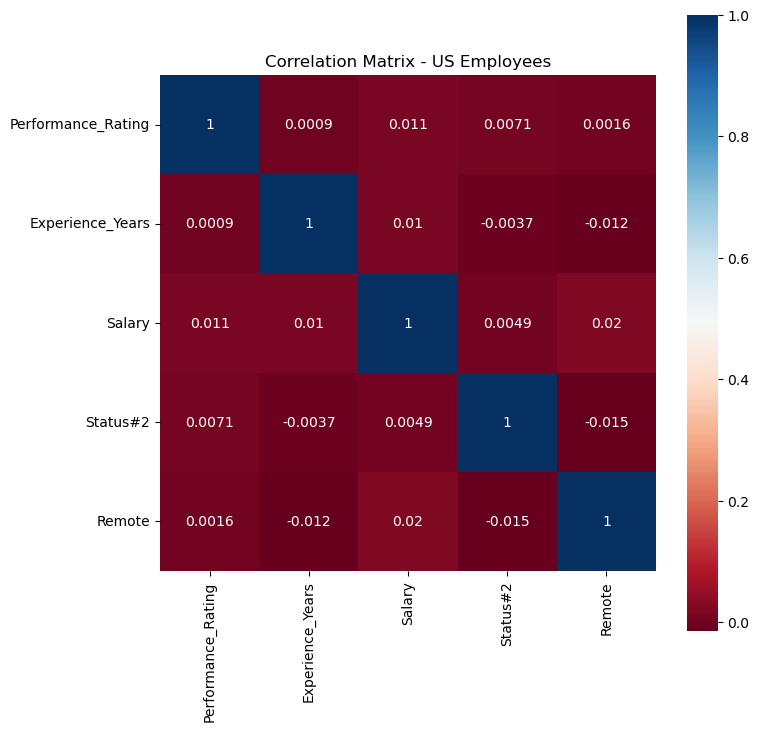

In [82]:
#correlation matrix of only US Employees
plt.figure(figsize=(8,8))
sns.heatmap(corr_US, annot=True, cmap='RdBu', square=True)
plt.title("Correlation Matrix - US Employees")
plt.show()

There is still little to no variation in the data. This matrix examines all the US-based employees in the sample. Almost all values are still zero here.

### Scatterplots

##### These scatterplots will be completed on the US-based employee sample so that they run in Python.

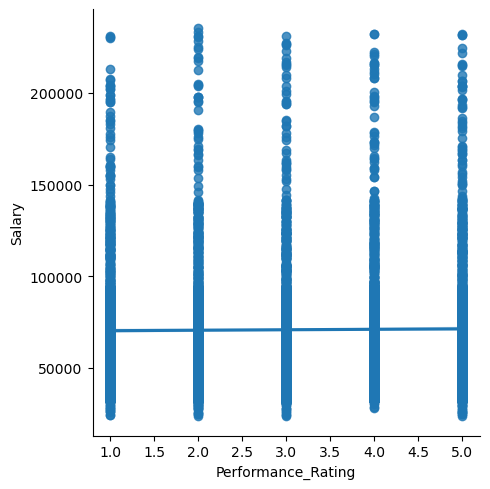

In [84]:
#Create a scatterplot for the "Perforamnce Rating" and "Salary" columns in seaborn
sns.lmplot(x = 'Performance_Rating', y = 'Salary', data = US_df)

In [149]:
#Create a subset excluding the "Date", "Employee ID", and "location" columns
US_sub = US_df[['Performance_Rating', 'Experience_Years', 'Salary', 'Remote','Status#2']]
US_sub

,Performance_Rating,Experience_Years,Salary,Remote,Status#2
278,4,1.0,68985,0,1
797,2,0.0,136654,0,1
1137,4,12.0,58891,1,1
1207,2,0.0,48587,0,1
2606,1,0.0,93436,1,0
...,...,...,...,...,...
1996817,2,1.0,48790,1,0
1997390,5,2.0,51233,1,1
1997777,2,11.0,67865,0,0
1999070,3,1.0,59486,0,0


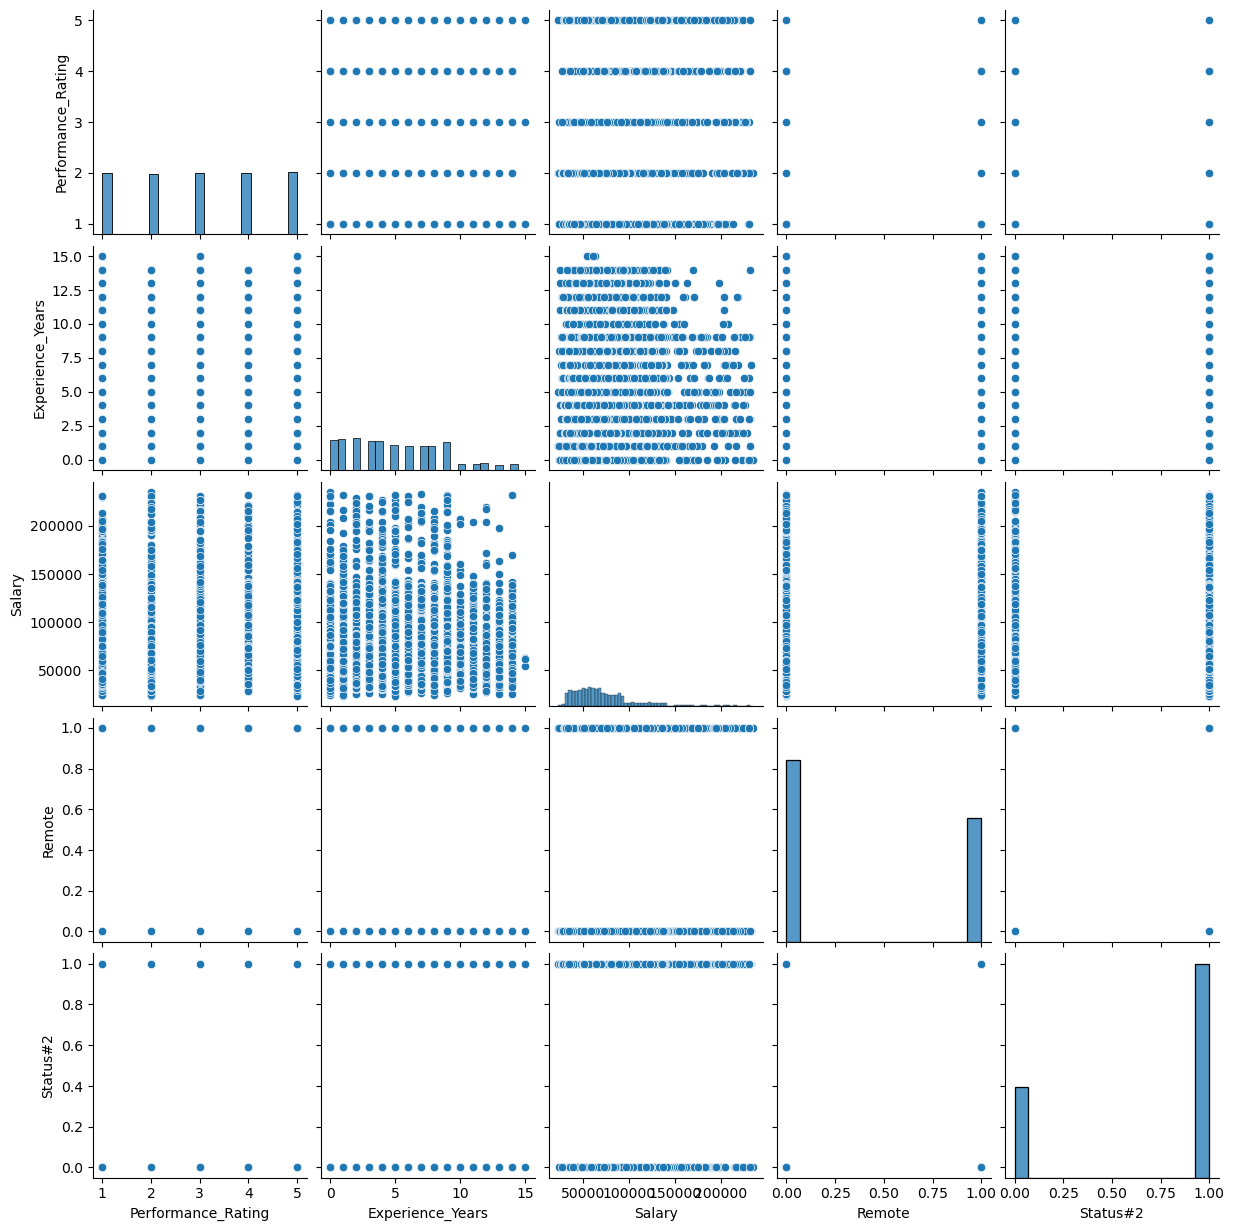

In [87]:
# Create a pair plot 
g = sns.pairplot(US_sub)

All of the data outside of the the Salary has categories. The data is a bit difficult to understand in these charts. You can see that the data does not have a strong relationship one way or another between these variables. Again, due to the large amount of data because any relationship present would have to be very strong to not be lost in the sheer volume of information. 
These charts only include the US-based employees which is around 8,000. There is still no relationship present here for these specific variables.

### Categorical Chart

##### These categorical charts will be completed on the US-based employee sample so that they run in Python.

<Axes: xlabel='Experience_Years', ylabel='Count'>

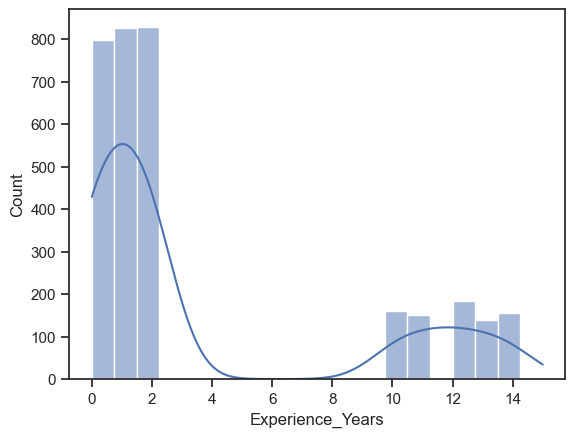

In [150]:
# Create a histogram to show the distribution of years of experience
sns.histplot(US_df['Experience_Years'], bins = 20, kde = True)

In [159]:
#Change the experience variable to numeric and forces it past any errors
df['Experience_Years'] = pd.to_numeric(df['Experience_Years'], errors='coerce')

In [160]:
df.loc[df['Experience_Years'] < 3, 'Experience_Category'] = 'Junior'

In [161]:
df.loc[(df['Experience_Years'] >= 3) & (df['Experience_Years'] <= 10), 'Experience_Category'] = 'Mid-level'

In [162]:
df.loc[df['Experience_Years'] > 10, 'Experience_Category'] = 'Senior'

In [163]:
#created categories based on years of experience
df['Experience_Category'].value_counts(dropna = False)

Experience_Category
Mid-level    1241559
Junior        597861
Senior        160580
Name: count, dtype: int64

In [164]:
#recalling this line to add the category variable into it for the next plot
US_df = df[df['Country'] == "United States of America"]

In [165]:
# Create a categorical plot in seaborn using the price categories created above
sns.set(style="ticks")
g = sns.catplot(x="Salary", y="Experience_Years", hue="Experience_Category", data=US_df)

Error in callback <function flush_figures at 0x000002378E348720> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

This chart shows a nice breakdown of various staff members and their salaries. There seems to be a wide range of salaries and it does not reveal any outlier information. The data itself just demonstrates that years of experience is not linked directly to higher salaries and across the US this varies by employee.

### 3) Data Export to Prepared Folder

In [167]:
#Save updated csv file to Prepared Data Folder
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'HR_Data_MNC_Data_Correlations.csv'))